# Prepare task1 dataset

imgsize(512,512), pixelvalue(0~1), saved in .npy
1. define functions of preprocess

In [1]:
import os
from loadFun import loadmat, kdata2img, multicoilkdata2img
import numpy as np
from PIL import Image

NAME_DICT ={"MultiCoil" :{"AccFactor04":"kspace_sub04",
                            "AccFactor08":"kspace_sub08",
                            "AccFactor10":"kspace_sub10",
                            "FullSample":"kspace_full"}, 
            "SingleCoil":{"AccFactor04":"kspace_single_sub04",
                            "AccFactor08":"kspace_single_sub08",
                            "AccFactor10":"kspace_single_sub10",
                            "FullSample":"kspace_single_full"}}

def paddingZero_np(np_data: np.array, target_shape: tuple):
    """
    for img data stored in np.array, fill zeros surrounding it to match the target_shape
    np_data: input
    """
    shape = np_data.shape
    H, W = shape[-2], shape[-1]
    # print(shape)
    padding_H = target_shape[0] - H
    padding_W = target_shape[1] - W
    # print(padding_H, padding_W)
    if len(shape) == 4:
        
        padding_size = ((0, 0), (0, 0), (padding_H // 2, padding_H - padding_H // 2), (padding_W // 2, padding_W - padding_W // 2))
        # print(padding_size)
    else:
        
        padding_size = ((0, 0), (0, 0), (0, 0), (padding_H // 2, padding_H - padding_H // 2), (padding_W // 2, padding_W - padding_W // 2))
        # print(padding_size)
    
    padded_np_data = np.pad(np_data, padding_size, mode='constant')

    return padded_np_data

def prepare_task1_dataset(base_dir, save_dir):
    base_dir = base_dir
    save_dir = save_dir
    modalityName = 'Cine'
    coilInfoSet = {'MultiCoil','SingleCoil'}
    acc_factorSet = {'AccFactor04','AccFactor08','AccFactor10','FullSample'}

    for coilInfo in coilInfoSet:
        for acc_factor in acc_factorSet:
            dir = os.path.join(base_dir,coilInfo,modalityName,'TrainingSet',acc_factor)
            # save_dir = os.path.join(save_dir,coilInfo,modalityName,'TrainingSet',acc_factor)
            print(dir)
            if os.path.isdir(dir):
                print('YES')
            else:
                print('Not exist')
            
            for item in os.listdir(dir):
                patient_dir = os.path.join(dir,item)
                lax_path = os.path.join(patient_dir, "cine_lax.mat")
                sax_path = os.path.join(patient_dir, "cine_sax.mat")
                
                #lax
                if os.path.exists(lax_path):
                    lax = loadmat(lax_path)
                    lax_data = lax[NAME_DICT[coilInfo][acc_factor]]
                    print(lax_data.shape)
                    lax_data = paddingZero_np(lax_data, (512, 512))
                    print(lax_data.shape)
                    if coilInfo == 'SingleCoil':
                        print('lax Single')
                        lax_imgs = kdata2img(lax_data)
                    else:
                        print('lax Multi')
                        lax_imgs = multicoilkdata2img(lax_data)
                    # print(lax_imgs.shape) # Here we have the same
                    frame_num, slice_num, H, W = lax_imgs.shape
                    for i in range(frame_num):
                        for j in range(slice_num):
                            img = lax_imgs[i, j, :, :]
                            img = img / np.max(img)
                            save_path = os.path.join(save_dir, acc_factor, "{}_{}_{}_{}_{}_{}_{}.npy".format(item, coilInfo, 'lax', i, j, H, W))
                            if not os.path.exists(os.path.join(save_dir, acc_factor)):
                                os.makedirs(os.path.join(save_dir, acc_factor))
                            np.save(save_path, img)

                #sax    
                if os.path.exists(sax_path):
                    sax = loadmat(sax_path)
                    sax_data = sax[NAME_DICT[coilInfo][acc_factor]]
                    print(sax_data.shape)
                    sax_data = paddingZero_np(sax_data, (512, 512))
                    print(sax_data.shape)
                    if coilInfo == 'SingleCoil':
                        print('sax Single')
                        sax_imgs = kdata2img(sax_data)
                    else:
                        print('sax Multi')
                        sax_imgs = multicoilkdata2img(sax_data)
                    # print(sax_imgs.shape)
                    frame_num, slice_num, H, W = sax_imgs.shape
                    for i in range(frame_num):
                        for j in range(slice_num):
                            img = sax_imgs[i, j, :, :]
                            img = img / np.max(img)
                            save_path = os.path.join(save_dir, acc_factor, "{}_{}_{}_{}_{}_{}_{}.npy".format(item, coilInfo, 'sax', i, j, H, W))
                            if not os.path.exists(os.path.join(save_dir, acc_factor)):
                                os.makedirs(os.path.join(save_dir, acc_factor))
                            np.save(save_path, img)


set "original_dataset_path" and "save_prepared_dataset_path" to your path

2. execute preprocess

In [2]:
original_dataset_path = "/home/txiang/CMRxRecon/CMRxRecon/MICCAIChallenge2023/ChallengeData"
save_prepared_dataset_path = "/home/txiang/CMRxRecon/CMRxRecon/MICCAIChallenge2023/Task1"
prepare_task1_dataset(original_dataset_path, save_prepared_dataset_path)

/home/txiang/CMRxRecon/CMRxRecon/MICCAIChallenge2023/ChallengeData/MultiCoil/Cine/TrainingSet/AccFactor08
YES
(12, 9, 10, 246, 512)
(12, 9, 10, 512, 512)
sax Multi
(12, 3, 10, 204, 448)
(12, 3, 10, 512, 512)
lax Multi
(12, 10, 10, 204, 512)
(12, 10, 10, 512, 512)
sax Multi
(12, 2, 10, 168, 448)
(12, 2, 10, 512, 512)
lax Multi
(12, 11, 10, 246, 512)
(12, 11, 10, 512, 512)
sax Multi
(12, 3, 10, 168, 448)
(12, 3, 10, 512, 512)
lax Multi
(12, 10, 10, 246, 512)
(12, 10, 10, 512, 512)
sax Multi
(12, 3, 10, 168, 448)
(12, 3, 10, 512, 512)
lax Multi
(12, 12, 10, 246, 512)
(12, 12, 10, 512, 512)
sax Multi
(12, 3, 10, 168, 448)
(12, 3, 10, 512, 512)
lax Multi
(12, 9, 10, 246, 512)
(12, 9, 10, 512, 512)
sax Multi
(12, 3, 10, 204, 448)
(12, 3, 10, 512, 512)
lax Multi
(12, 10, 10, 246, 512)
(12, 10, 10, 512, 512)
sax Multi
(12, 3, 10, 204, 448)
(12, 3, 10, 512, 512)
lax Multi
(12, 11, 10, 246, 512)
(12, 11, 10, 512, 512)
sax Multi
(12, 3, 10, 168, 448)
(12, 3, 10, 512, 512)
lax Multi
(12, 9, 10, 24

3. generate Training_pair.txt：every line in format of [input_path, GT_path]

In [2]:
import os
def generate_training_pairs(base_path):
    acc_factorSet = {'AccFactor04','AccFactor08','AccFactor10'}
    for acc_factor in acc_factorSet:
        imgs_dir = os.path.join(base_path, acc_factor)
        imgs_list = os.listdir(imgs_dir)
        file = "{}_rMax_512_training_pair.txt".format(acc_factor)
        file_obj = open(file, "a")
        for img_name in imgs_list:
            img_path = os.path.join(imgs_dir, img_name)
            GT_path = os.path.join(base_path, 'FullSample', img_name)
            if os.path.exists(img_path) and os.path.exists(GT_path):
                file_obj.writelines([img_path, " ", GT_path, "\n"])

generate_training_pairs(save_prepared_dataset_path)# 用preprocessed dataset路径

4. define custom Dataset

In [4]:
from torch.utils.data import Dataset
import numpy as np

class CMRxReconTask1Dataset(Dataset):
    
    def __init__(self, file_path, transform=None):
        """
        file_path: train_pair.txt
        transform: pytorch transform
        """
        self.name_dict = {"MultiCoil":{"AccFactor04":"kspace_sub04",
                                       "AccFactor08":"kspace_sub08",
                                       "AccFactor10":"kspace_sub10",
                                       "FullSample":"kspace_full"}, 
                          "SingleCoil":{"AccFactor04":"kspace_single_sub04",
                                       "AccFactor08":"kspace_single_sub08",
                                       "AccFactor10":"kspace_single_sub10",
                                       "FullSample":"kspace_single_full"}}
        self.file_path = file_path
        
        file_obj = open(self.file_path, "r")
        self.train_pairs = file_obj.readlines()
        file_obj.close()
        
        self.transform = transform

    def __len__(self):
        return len(self.train_pairs)
    
    def __getitem__(self, index):
        path, GT_path = self.train_pairs[index].replace("\n","").split(" ")
        print(path, GT_path)
        if path.endswith('.npy'):
            item = np.load(path)
            GT_item = np.load(GT_path)
            output = {"input": item, "GT": GT_item}
            if self.transform:
                data = np.stack((item, GT_item), axis=-1)
                transformed_data = self.transform(data)
                output = {"input": transformed_data[0,:,:].unsqueeze(0), "GT": transformed_data[1,:,:].unsqueeze(0)}
            return output

Try Task1_dataset

35808
/public/home/yuewj/work/CMRxRecon/ChallengeData_img512_rMax/AccFactor04/P043_MultiCoil_lax_11_2_512_512.npy /public/home/yuewj/work/CMRxRecon/ChallengeData_img512_rMax/FullSample/P043_MultiCoil_lax_11_2_512_512.npy


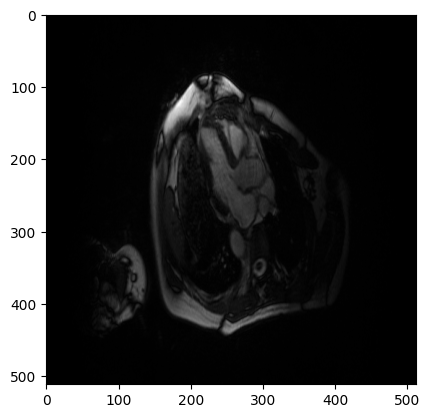

In [8]:
task1_dataset = CMRxReconTask1Dataset(file_path="AccFactor04_rMax_512_training_pair.txt")
print(len(task1_dataset))

data47 = task1_dataset[47]
inp = data47["input"]
GT = data47["GT"]
import matplotlib.pyplot as plt
# plt.imshow(GT-inp,cmap='gray')
plt.imshow(GT, cmap='gray')